In [ ]:
'''
Aim: prove that solution using finite differences, when using smaller lattice space, the solution converge to the result using homogenisation.
'''

import numpy as np
from copy import deepcopy

cond2=10
def coefs(i,j):
    '''
    # RU arrow
    if (i+j)%2==0:
        #up,left,down,right
        return (1,1,cond2,cond2)
    else:
        return (cond2,cond2,1,1)
        '''
    # LU arrow
    if (i+j)%2==0:
        #up,left,down,right
        return (1,cond2,cond2,1)
    else:
        return (cond2,1,1,cond2)
        
dim=101
grid=np.zeros((dim,dim))

center=int((dim-1)/2)
grid[center,center]=6000
def update(i,j):
    #gives updated value of i,j point
    up=grid[i-1,j]
    left=grid[i,j-1]
    down=grid[i+1,j]
    right=grid[i,j+1]
    co=coefs(i,j)
    val=(
        up*co[1]*co[2]*co[3]
        +left*co[0]*co[2]*co[3]
        +down*co[0]*co[1]*co[3]
        +right*co[0]*co[1]*co[2]
    )/sum(co)

    return val
newgrid=deepcopy(grid)
for time in range(101):
    
    for i in range(1,dim-1):
        for j in range(1,dim-1):
            newgrid[i,j]=update(i,j)
    newgrid[center,center]=grid[center,center]
    
    grid=deepcopy(newgrid)
    #print(time)
#print(grid)
def u(x,y):
    return newgrid[x,y]


from matplotlib import pyplot as plt
#a=[i for i in range(dim)]
#x,y=np.meshgrid(a,a)
#plt.matshow(grid, cmap=plt.cm.gray)
#plt.show()

x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)


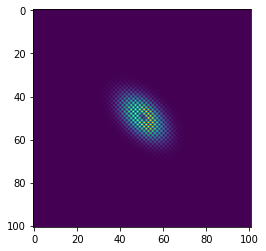

In [34]:
plt.imshow(grid)

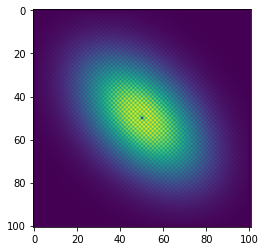

In [35]:
plt.imshow(grid**0.1)

<ipython-input-36-c3a2cc071f31>:1: RuntimeWarning: divide by zero encountered in log2
  plt.imshow(np.log2(grid))


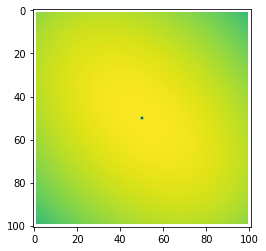

In [36]:
plt.imshow(np.log2(grid))